# Image Classification using CNN for CIFAR-10 data

## Part-I: Baseline Model

### 1. Import Libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.backend import categorical_crossentropy
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 151s 1us/step


In [3]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### 3. Print the shape of one image

In [4]:
X_train[444].shape

(32, 32, 3)

### 4. Display one image

[9]


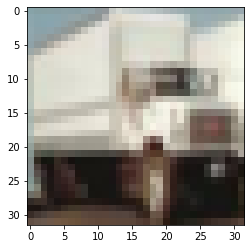

In [5]:
print(y_train[444])
plt.imshow(X_train[444])

### 5. Convert y_train and y_test into categorical values

In [6]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 6. Convert train data into float and sclae

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### 7. Build CNN

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### 8. Print summary and verify configuration

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                        

### 9. Compile and fit and validate

In [11]:
opt = RMSprop(learning_rate=0.0005, decay=1e-6)
loss = 'categorical_crossentropy'
met = ['accuracy']

In [12]:
model.compile(optimizer=opt, loss=loss, metrics=met)

In [13]:
history = model.fit(X_train, y_train, shuffle=True, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 44s 32ms/step - loss: 1.7434 - accuracy: 0.3644 - val_loss: 1.5041 - val_accuracy: 0.4603
Epoch 2/15
1250/1250 [==============================] - 44s 35ms/step - loss: 1.4551 - accuracy: 0.4721 - val_loss: 1.3503 - val_accuracy: 0.5199
Epoch 3/15
1250/1250 [==============================] - 41s 33ms/step - loss: 1.3438 - accuracy: 0.5189 - val_loss: 1.2462 - val_accuracy: 0.5635
Epoch 4/15
1250/1250 [==============================] - 42s 34ms/step - loss: 1.2695 - accuracy: 0.5489 - val_loss: 1.1790 - val_accuracy: 0.5842
Epoch 5/15
1250/1250 [==============================] - 42s 33ms/step - loss: 1.2236 - accuracy: 0.5672 - val_loss: 1.1702 - val_accuracy: 0.5869
Epoch 6/15
1250/1250 [==============================] - 40s 32ms/step - loss: 1.1847 - accuracy: 0.5815 - val_loss: 1.1059 - val_accuracy: 0.6117
Epoch 7/15
1250/1250 [==============================] - 40s 32ms/step - loss: 1.1573 - accuracy: 0.5943 - val_loss: 1.1049 -

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 1.0659663677215576
Test accuracy: 64.44000005722046


## Part-II: Model Improvements

In [15]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(5,5), strides=1, padding='same', activation='relu', input_shape=(32,32,3)))
model1.add(Conv2D(filters=32, kernel_size=(5,5), strides=1, padding='same', activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=64, kernel_size=(5,5), strides=1, padding='same', activation='relu', input_shape=(32,32,3)))
model1.add(Conv2D(filters=64, kernel_size=(5,5), strides=1, padding='same', activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.25))
model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss=loss, metrics=met)

history1 = model1.fit(X_train, y_train, shuffle=True, epochs=5, batch_size=32, validation_split=0.2)

score1 = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1]*100)

Epoch 1/5
1250/1250 [==============================] - 485s 387ms/step - loss: 1.6698 - accuracy: 0.3854 - val_loss: 1.3989 - val_accuracy: 0.4890
Epoch 2/5
1250/1250 [==============================] - 514s 411ms/step - loss: 1.2969 - accuracy: 0.5343 - val_loss: 1.1519 - val_accuracy: 0.5861
Epoch 3/5
1250/1250 [==============================] - 515s 412ms/step - loss: 1.1241 - accuracy: 0.6004 - val_loss: 1.0598 - val_accuracy: 0.6258
Epoch 4/5
1250/1250 [==============================] - 497s 398ms/step - loss: 1.0029 - accuracy: 0.6436 - val_loss: 0.9645 - val_accuracy: 0.6582
Epoch 5/5
1250/1250 [==============================] - 473s 379ms/step - loss: 0.9073 - accuracy: 0.6790 - val_loss: 0.8948 - val_accuracy: 0.6876
Test loss: 0.9003661870956421
Test accuracy: 68.14000010490417
